# Recognize Handwriting with Sci-kit Learn

As a AI engineering student, I want to understand how ML systems can recognize images. To learn more about this I want to train ML models to recognize handwritten digits. While the focus is on building a system that works, I suspect this to be relatively easy. After I have a working system, I want to learn more about the various algorithms at work, potentially comparing various algorithms in function and accuracy.

For the first part of this learning story I have followed along with the Supervised Learning with Sci-kit learn course on Datacamp [1].

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are di

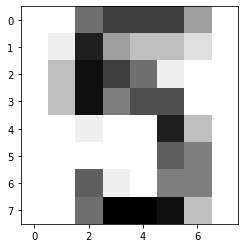

In [13]:
# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits.DESCR)

# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In the above file I import the dataset, assign it to the variable 'digits', and than print some information about the dataset. To verify one of the samples from this dataset, I plot it using matplotlib.

In the next step I will train a K-nearest neigbhor algorithm on the dataset.

In [12]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

# print a sample


0.9833333333333333
[ 0.  0.  2. 13.  8.  0.  0.  0.  0.  0.  6. 16. 16.  6.  0.  0.  0.  0.
  5. 15. 13. 11.  0.  0.  0.  0.  0.  7. 16. 15.  0.  0.  0.  0.  0.  0.
  0. 14.  3.  0.  0.  0.  0.  0.  0.  7. 11.  0.  0.  0.  0.  3.  4.  4.
 16.  2.  0.  0.  2. 15. 13. 14. 13.  2.]


First I set up the X and y according to Sci-kit learn best practises, with the training data and the target data (The data in this case are the pixel information, the target is the label for what digit is represented by the data). I then use the train_test_split function, to divide the dataset in a training group and a test group. This allows me to score the accuracy of the implemented algorithm. I assign the classifier, I than train the model (using the fit() funciton). After it is trained I print the accuracy by using the score() function.

In the next block I will test for over or underfitting.

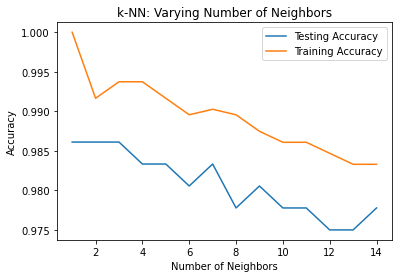

In [9]:
import numpy as np

# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 15)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


First I build the right variables. A list of integers for different vallues of n for the KNeighbors classifier. A list to store the training accuracy information in, and a list to store the test accuracy information in.

By looping over the list with integers, I can run the KNeigbhors classifier multiple times each with a different n for the algorithm. I can than store this information in the previously made lists, and plot this information in a graph.

As you can see after n = 3 the accuracy of the test mostly declines.

So this is a functioning digit writing recognition tool that we can even test the accuracy for. But it still feels kind of boring, I want to gain more direct insight into the prediction power of this model. To do so I want to use the predict function on separete samples from the test dataset. I also want to acompany this with a plot of the sample, to gain visual insight into the process.

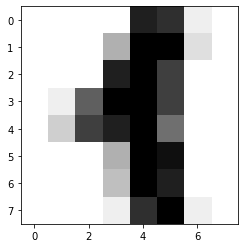

Prediction: [1]
Label: 1


In [26]:
# Display digit N
N = 11
plt.imshow(digits.images[N], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

# Predict and print the label for the new data point X_new
X_new = [X[N]]

prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Label: {}".format(digits.target[N]))

In [ ]:
This concludes the Sci-Kit Learn Implementation of KNN.

# References

[1] Datacamp.com, “The digits recognition dataset | Python.” https://campus.datacamp.com/courses/supervised-learning-with-scikit-learn/classification?ex=10 (accessed Nov. 23, 2020).